SMART-CART

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Pharma import kmeans

In [74]:
data  = pd.read_csv("smartcart_customers.csv")
df = pd.DataFrame(data)

In [75]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [77]:
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [78]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

Handle Missing Values

In [79]:
df["Income"] = df["Income"].fillna(df["Income"].median())

In [80]:
df["Income"].isnull().sum()

np.int64(0)

In [81]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


Handling Date Data

In [82]:
#Age
df["Age"] = 2026  - df["Year_Birth"]

In [83]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,88,88,3,8,10,4,7,0,1,69
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,6,2,1,1,2,5,0,0,72
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,21,42,1,8,2,10,4,0,0,61
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,3,5,2,2,0,4,6,0,0,42
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,27,15,5,5,3,6,5,0,0,45


In [84]:
#Customer Joining Dates
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"]  , dayfirst=True )

reference_date = df["Dt_Customer"].max()
df["Customer_Tenure_Days"] = (reference_date - df["Dt_Customer"]).dt.days

In [85]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,88,3,8,10,4,7,0,1,69,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,6,2,1,1,2,5,0,0,72,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,42,1,8,2,10,4,0,0,61,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,5,2,2,0,4,6,0,0,42,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,15,5,5,3,6,5,0,0,45,161


In [86]:
#Spending
df["Total_Spending"] = df["MntWines"] + df["MntFruits"]  + df["MntFishProducts"] + df["MntMeatProducts"] + df["MntGoldProds"] + df["MntSweetProducts"]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,8,10,4,7,0,1,69,663,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,1,1,2,5,0,0,72,113,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,1,8,2,10,4,0,0,61,312,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,2,0,4,6,0,0,42,139,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,5,3,6,5,0,0,45,161,422


In [87]:
#Children
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

In [88]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,8,10,4,7,0,1,69,663,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,1,2,5,0,0,72,113,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,8,2,10,4,0,0,61,312,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,0,4,6,0,0,42,139,53,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,3,6,5,0,0,45,161,422,1


In [89]:
#Education
df["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [90]:
df["Education"] = df["Education"].replace({"Basic" : "Undergraduate", "2n Cycle" : "Undergraduate", "Graduation" : "Graduate" , "Master" : "Postgraduate" , "PhD" : "Postgraduate"})

In [91]:
df["Education"].value_counts()


Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

In [92]:
#Marital Status
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [93]:
df["Living_With"] = df["Marital_Status"].replace({"Married" : "Partner", "Together" : "Partner", "Single" : "Alone" , "Divorced" : "Alone" , "Widow" : "Alone" , "Absurd" : "Alone" , "YOLO" : "Alone"})

In [94]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Living_With
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,1,69,663,1617,0,Alone
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,72,113,27,2,Alone
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,61,312,776,0,Partner
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,42,139,53,1,Partner
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,45,161,422,1,Partner


In [95]:
df.shape

(2240, 27)

In [96]:
cols = ["ID" ,"Year_Birth" , "Marital_Status" , "Kidhome" ,"Teenhome" , "Dt_Customer"]

spending_cols = ["MntWines" ,"MntFruits" ,"MntMeatProducts" ,"MntGoldProds" ,"MntSweetProducts" , "MntFishProducts"]

cols_to_drop = cols + spending_cols

df_cleaned = df.drop(columns=cols_to_drop)

In [97]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


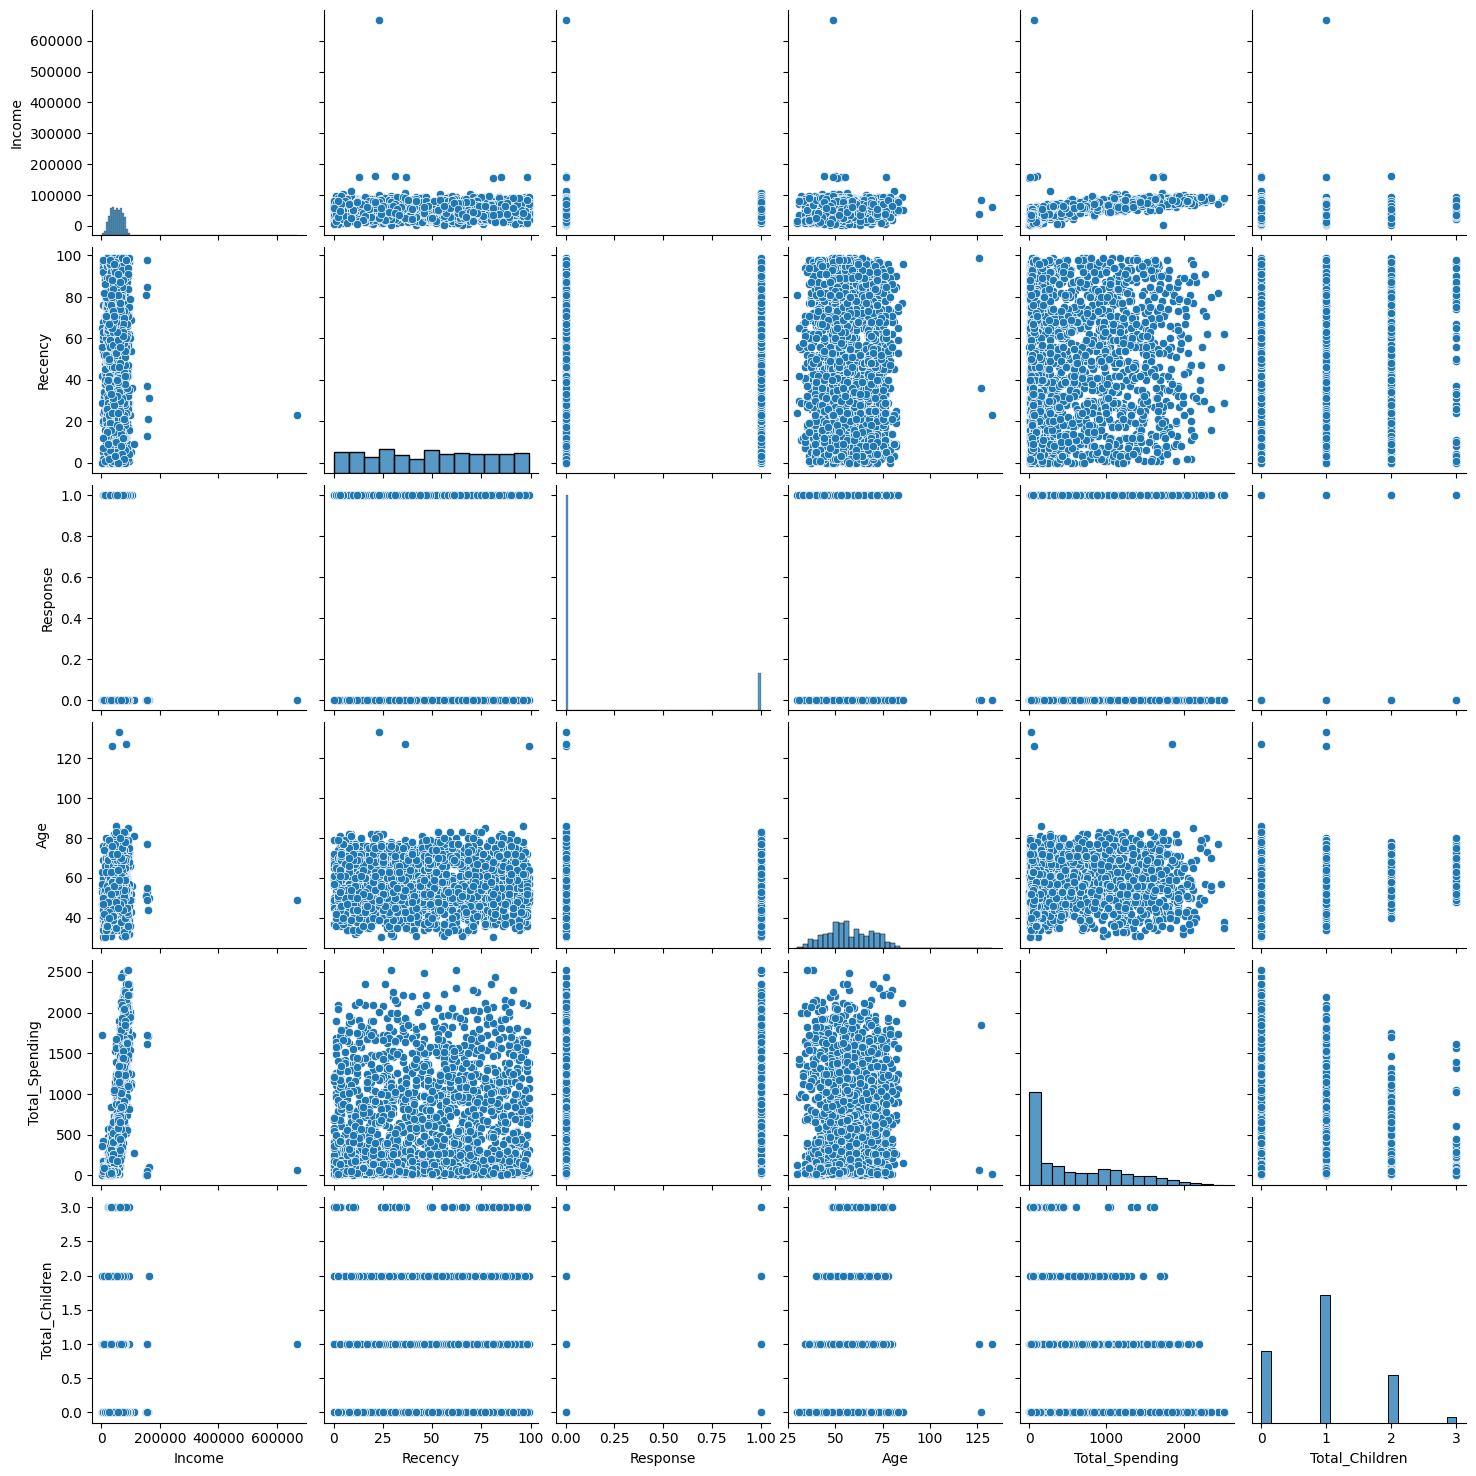

In [98]:
#Outliers
cols = ["Income" , "Recency" , "Response" , "Age" , "Total_Spending" , "Total_Children"]

sns.pairplot(df_cleaned[cols])

In [99]:
print(" data size with outliers" , len(df_cleaned))

df_cleaned = df_cleaned[df_cleaned["Age"] < 90]
df_cleaned = df_cleaned[df_cleaned["Income"] < 600000]

print(" data size without outliers" , len(df_cleaned))

 data size with outliers 2240
 data size without outliers 2236


Heatmap

In [100]:
corr = df_cleaned.corr(numeric_only=True)

<Axes: >

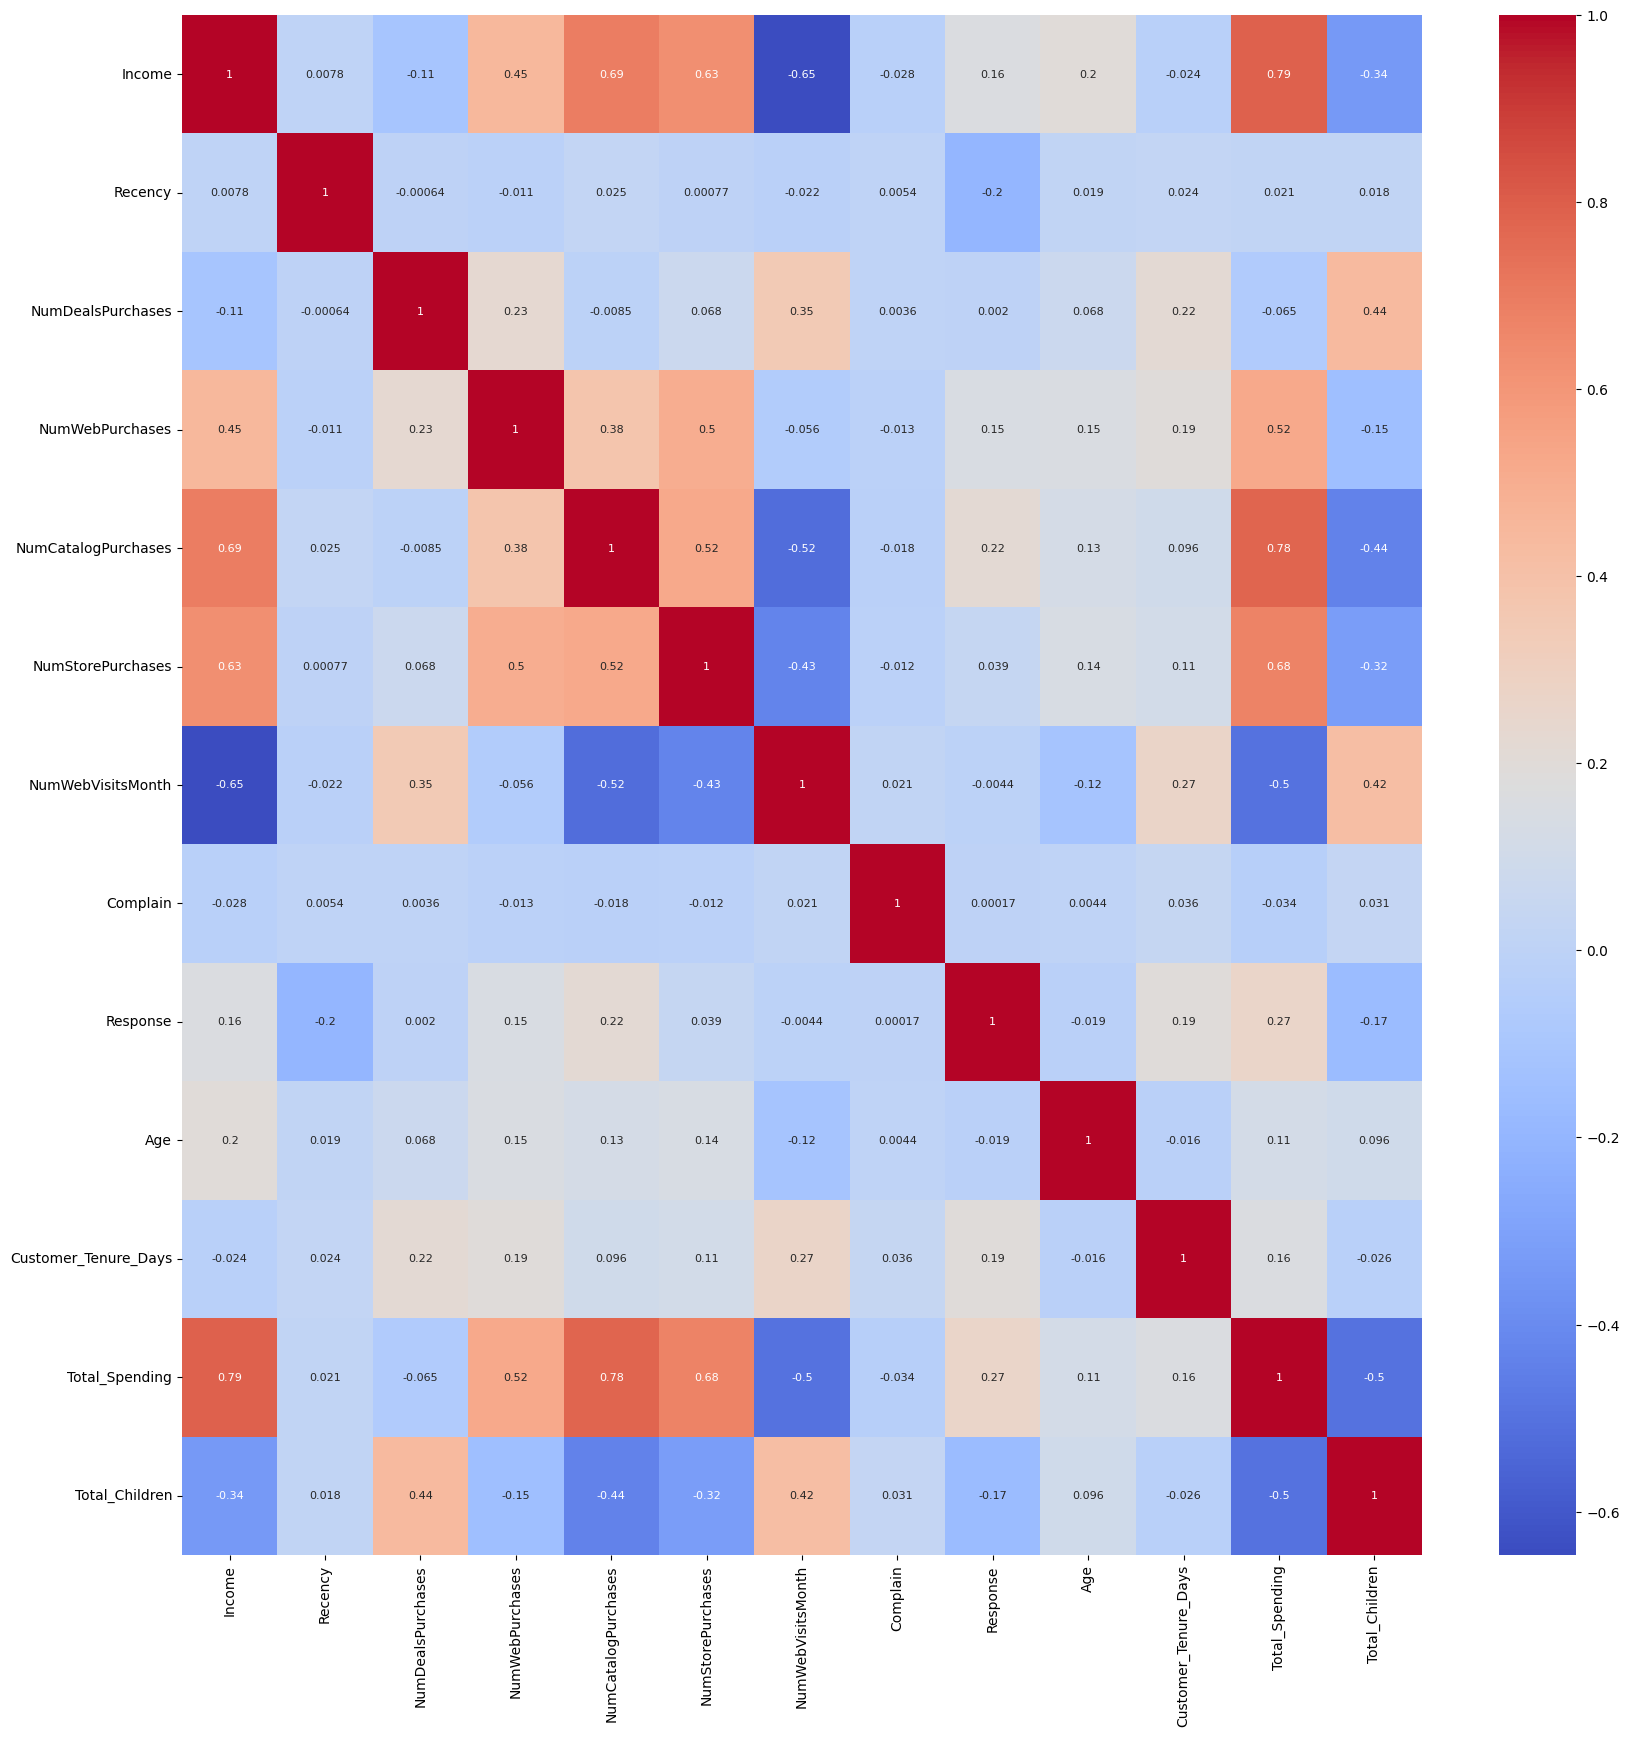

In [101]:
plt.figure(figsize=(20,20))

sns.heatmap(corr ,annot=True, cmap="coolwarm" , annot_kws={"size":8 } )

In [102]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


ENCODING

In [103]:
from sklearn.preprocessing import OneHotEncoder

In [104]:
ohe = OneHotEncoder(handle_unknown="ignore")

cat_cols = ["Education" , "Living_With"]

enc_cols = ohe.fit_transform(df_cleaned[cat_cols])

In [105]:
enc_df  = pd.DataFrame(enc_cols.toarray(), columns=ohe.get_feature_names_out(cat_cols) , index= df_cleaned.index)

In [106]:
enc_df.head()

,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [107]:
df_encoded = pd.concat([df_cleaned.drop(columns=cat_cols)  , enc_df] , axis=1)

In [108]:
df_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0


Scaling

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [111]:
X = df_encoded

In [112]:
X_scaled  = scaler.fit_transform(X)

Visualization

In [113]:
X_scaled.shape

(2236, 18)

In [114]:
#2D
from sklearn.decomposition import PCA

In [122]:
pca = PCA(n_components=3)

x_pca = pca.fit_transform(X_scaled)

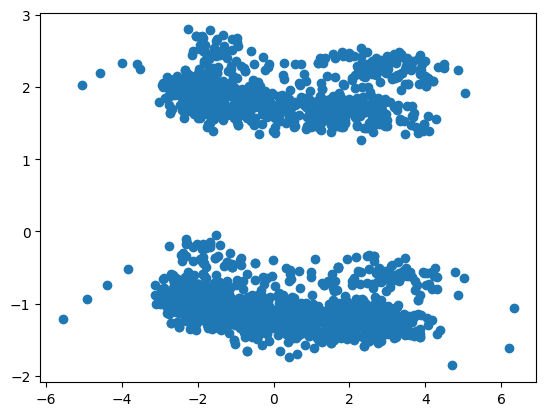

In [123]:
#plot
plt.scatter(x_pca[: ,0] , x_pca[: ,1] , marker="o")

In [124]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

Text(0.5, 0, 'PCA 3')

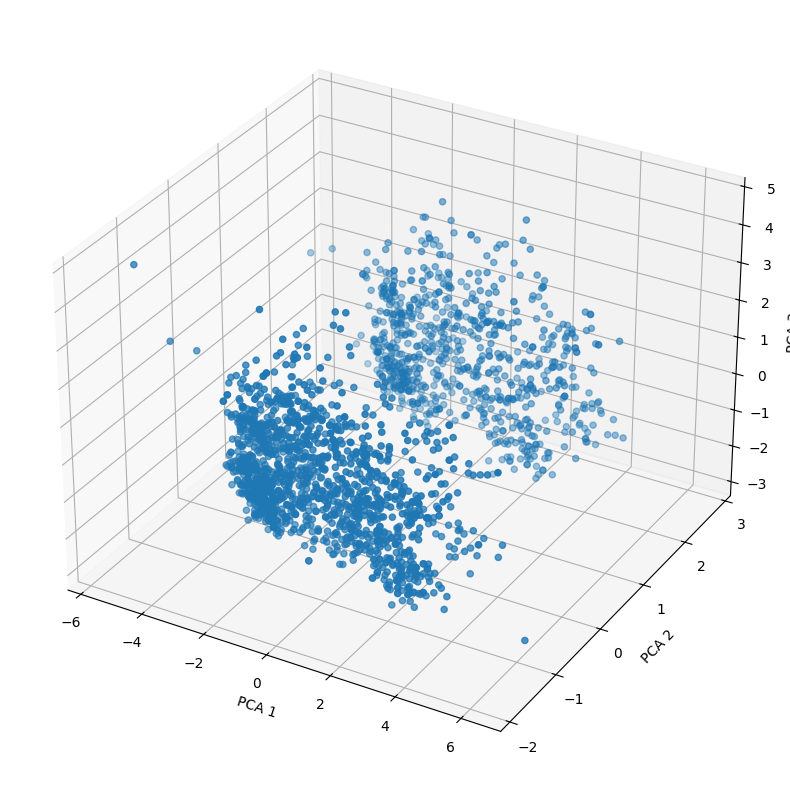

In [130]:
#plot
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111 , projection="3d")

ax.scatter(x_pca[: , 0] , x_pca[: , 1] , x_pca[: , 2], marker="o")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

*Analyze K Value*
1. Elbow Method

In [131]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from kneed import KneeLocator

wcss = []
for k in range(1 , 11):
    kmeans = KMeans(n_clusters=k  , random_state=42)
    kmeans.fit_predict(x_pca)
    wcss.append(kmeans.inertia_)

In [133]:
Knee = KneeLocator(range(1 , 11), wcss , curve="convex", direction="decreasing")
optimal_k = Knee.elbow

In [134]:
print("best_k = ", optimal_k)

best_k =  4


Text(0, 0.5, 'WCSS')

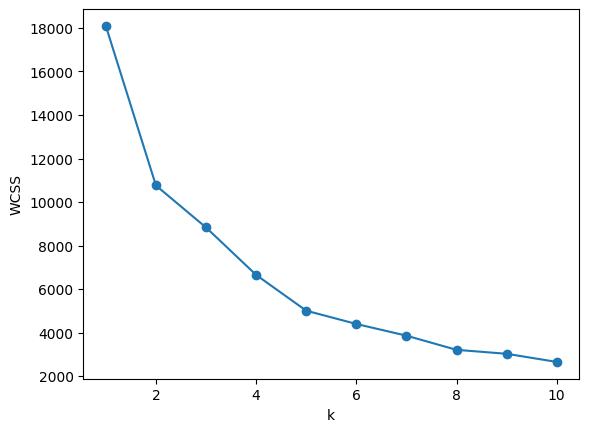

In [138]:
plt.plot(range(1 , 11), wcss , marker='o')
plt.xlabel("k")
plt.ylabel("WCSS")

## Silhouette Score

In [140]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k , random_state=42)
    labels = kmeans.fit_predict(x_pca)
    score = silhouette_score(x_pca, labels)
    scores.append(score)

Text(0, 0.5, 'Silhouette Score')

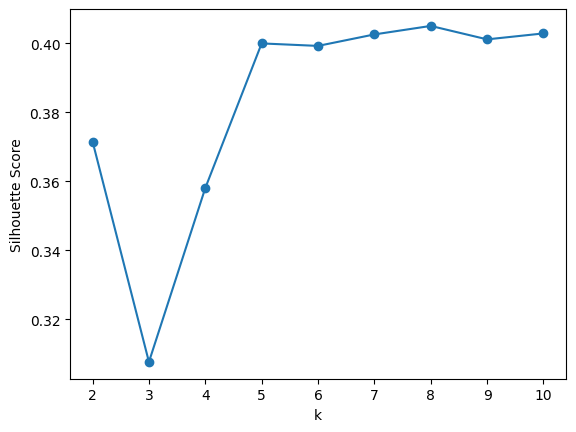

In [143]:
plt.plot(range(2 , 11), scores , marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette Score")


Text(0, 0.5, 'Silhouette Score')

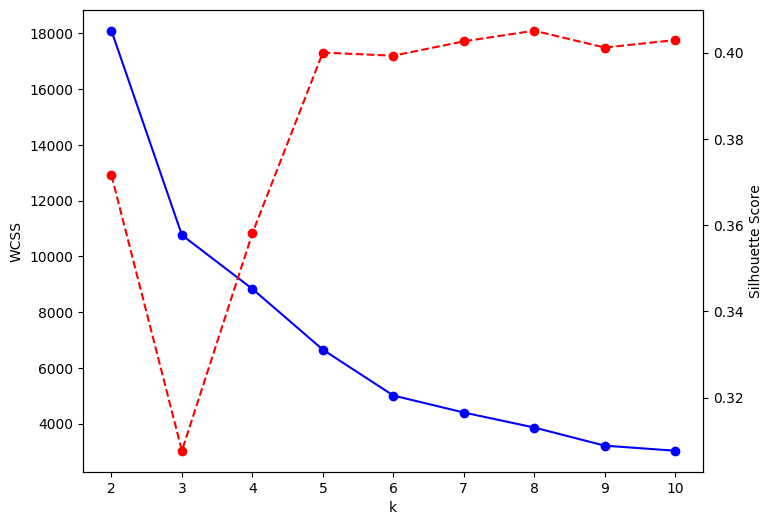

In [151]:
#combined

k_range = range(2 , 11)
fig , ax1 = plt.subplots(figsize=(8,6))

ax1.plot(k_range , wcss[:len(k_range)]  , marker='o' , color='blue')
ax1.set_xlabel("k")
ax1.set_ylabel("WCSS")

ax2 = ax1.twinx()
ax2.plot(k_range , scores[:len(k_range)] , marker='o' , color='red'  , linestyle='dashed')
ax2.set_ylabel("Silhouette Score")

# Clustering

In [152]:
kmeans = KMeans(n_clusters=4 , random_state=42)
labels = kmeans.fit_predict(x_pca)

Text(0.5, 0, 'PCA 3')

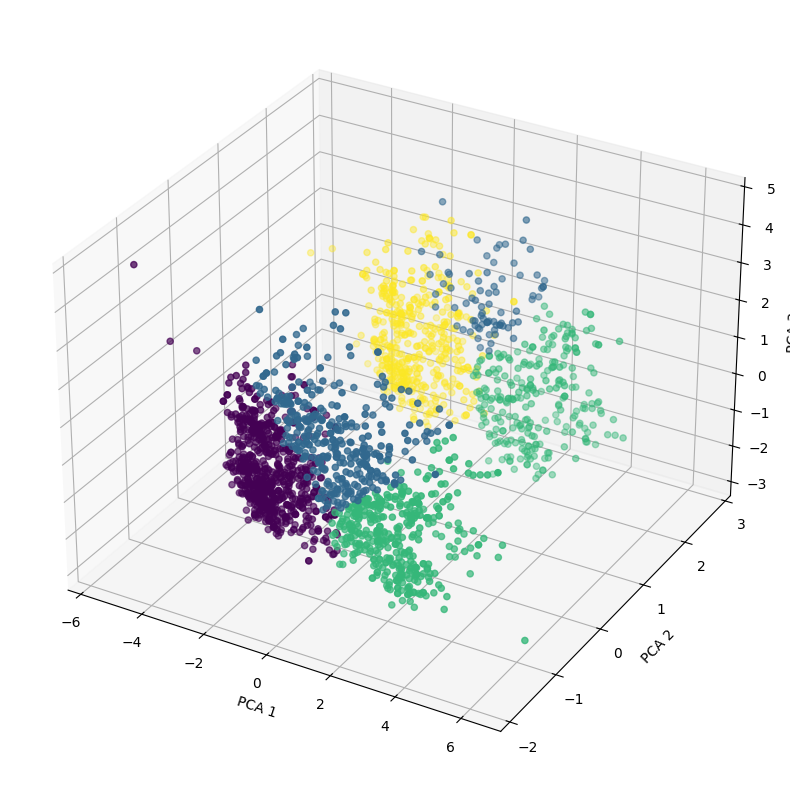

In [153]:
#plot
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111 , projection="3d")

ax.scatter(x_pca[: , 0] , x_pca[: , 1] , x_pca[: , 2], marker="o" ,c = labels)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

In [155]:
#Agglomerative
from sklearn.cluster import AgglomerativeClustering

In [157]:
agg_clf = AgglomerativeClustering(n_clusters = 4 , linkage = "ward")
labels_agg = agg_clf.fit_predict(x_pca)

Text(0.5, 0, 'PCA 3')

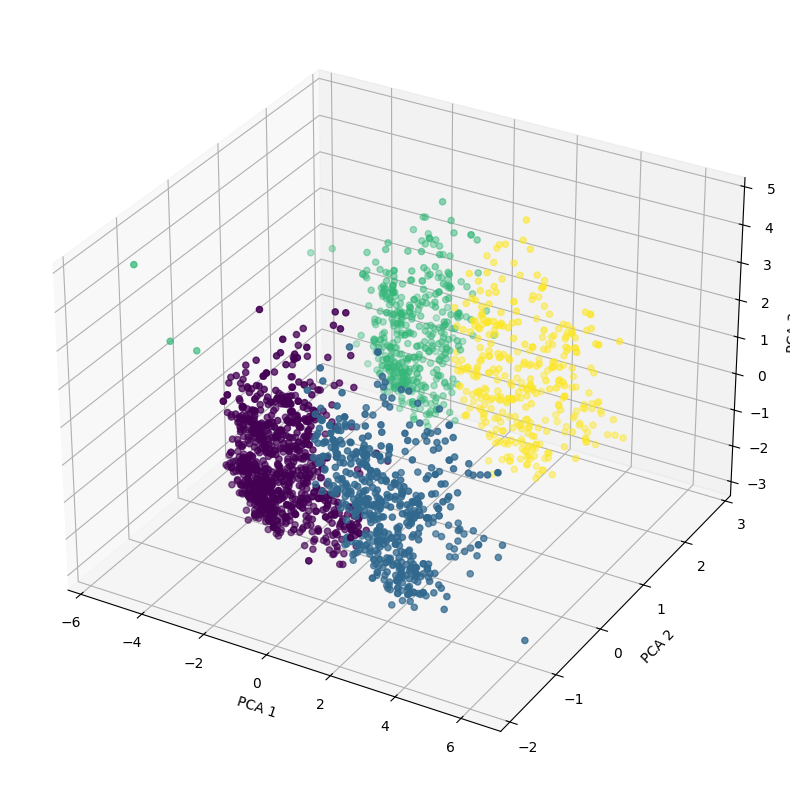

In [158]:
#plot
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111 , projection="3d")

ax.scatter(x_pca[: , 0] , x_pca[: , 1] , x_pca[: , 2], marker="o" ,c = labels_agg)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

# Characterisation

In [168]:
X["cluster"] = labels_agg

In [169]:
X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,cluster
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0,0


<Axes: xlabel='cluster', ylabel='count'>

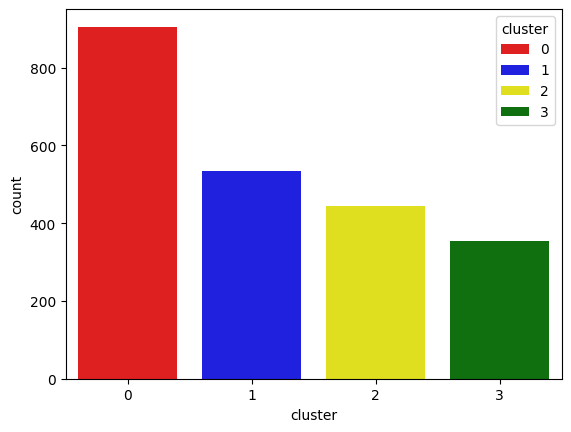

In [170]:
pal = ["red" , "blue" , "yellow" , "green"]
sns.countplot(x = X["cluster"] , palette = pal , hue = X["cluster"])

<Axes: xlabel='Total_Spending', ylabel='Income'>

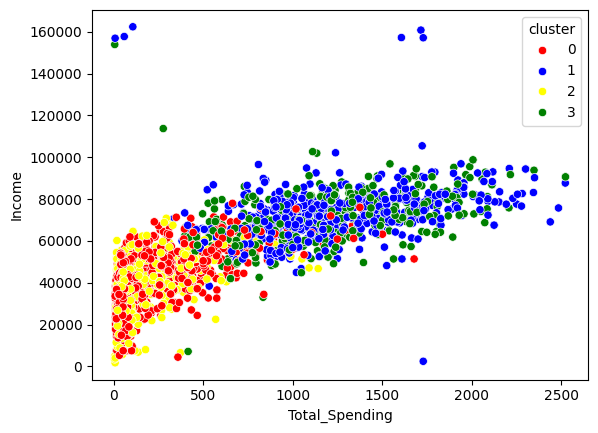

In [171]:
#Income & Spending Patterns

sns.scatterplot(x = X["Total_Spending"] , y = X["Income"] , hue = X["cluster"] ,palette= pal)

In [172]:
cluster_summary  = X.groupby("cluster").mean()
print(cluster_summary)

               Income    Recency  NumDealsPurchases  NumWebPurchases  \
cluster                                                                
0        39680.580110  48.914917           2.594475         3.153591   
1        72808.445693  49.202247           1.958801         5.687266   
2        36960.143018  48.319820           2.594595         2.713964   
3        70722.681303  50.504249           1.855524         5.790368   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
cluster                                                                        
0                   0.969061           4.143646           6.307182  0.011050   
1                   5.498127           8.659176           3.580524  0.005618   
2                   0.837838           3.623874           6.659910  0.011261   
3                   5.014164           8.430595           3.728045  0.005666   

         Response        Age  Customer_Tenure_Days  Total_Spending  \
cluster         